In [1]:
# import basic libraries

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# getting dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# dimension
df.shape

(7043, 21)

In [4]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset consist of both categorical and numerical columns. We also observe that dataset don't have any null values, so we can move ahead 

In [5]:
# let's see the unique values of our dataset

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Here customerID is merely an id provided to the customer, we can drop it, as it doesnot help much in ML model Building. And also we can see that TotalCharges, has numerical data, but its datatype is Object here, let's check it.

In [6]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

We can observe that it has 11 row with blankspace, which makes it object type column, let's chcek those rows first, then will replace them with nan. Then we will treat these Nan.

In [7]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# replacing blankspaces with NaN
df['TotalCharges']=df['TotalCharges'].replace(" ", np.nan)

In [9]:
df.isnull().sum()  # checking nullvalues 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# let's convert column type from Object to Float for TotalCharges
df['TotalCharges']=df['TotalCharges'].astype(float)


In [11]:
# Handling the Nan values, using mean
df['TotalCharges']=df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now, our datset don't have any null values, it is safe to proceed ahead

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

We can observe that Totalcharges is float now, Our objective here is to predict the Churn i.e. our label is Churn while rest are features.

For features we have Categorical data and Continuous data.

Categorical data has two types: 1) Nominal data 2) Ordinal data

Categorical columns are(Nominal Data): 'gender','Partner','Dependents', 'PhoneServices', 'MultipleLines','InternetServices', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod','Churn'.

Ordinal Data: 'SeniorCitizen', 'tenure'. (this are already converted into numerical form)

Continuous Columns are :  'MonthlyCharges', 'TotalCharges'.

Not useful column: customerID, we can drop it.

In [14]:
df.drop('customerID',axis=1,inplace=True)
df.shape

(7043, 20)

In [16]:
# Let's visualize our categorical columns

df_cat=df[['gender','Partner','Dependents', 'PhoneService', 'MultipleLines','InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 
           'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod','Churn']].copy()

In [17]:
df_cat.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


# EDA

Male      3555
Female    3488
Name: gender, dtype: int64


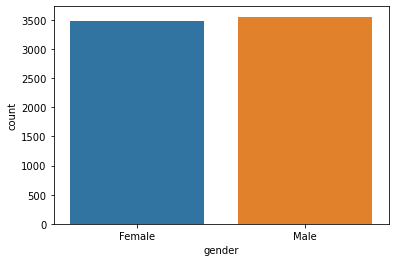

In [19]:
ax=sns.countplot('gender', data=df_cat)
print(df_cat['gender'].value_counts())

Both the classes are almost equally distibuted.

No     3641
Yes    3402
Name: Partner, dtype: int64


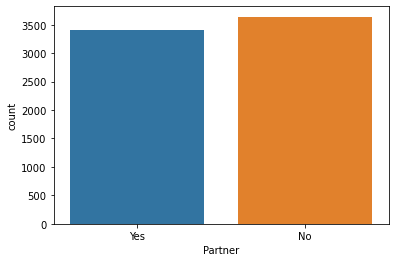

In [20]:
ax=sns.countplot('Partner', data=df_cat)
print(df_cat['Partner'].value_counts())

We can observe that total number of unmarried is 3641 and married is 3402

No     4933
Yes    2110
Name: Dependents, dtype: int64


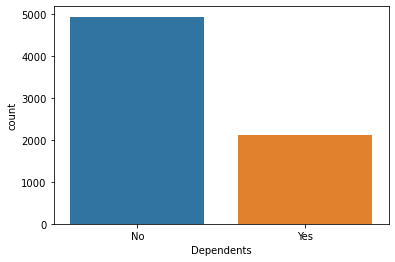

In [21]:
ax=sns.countplot('Dependents', data=df_cat)
print(df_cat['Dependents'].value_counts())

We can observe that non dependents are high then dependents

Yes    6361
No      682
Name: PhoneService, dtype: int64


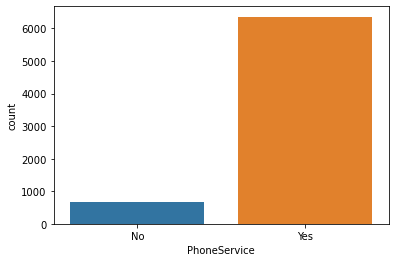

In [22]:
ax=sns.countplot('PhoneService', data=df_cat)
print(df_cat['PhoneService'].value_counts())

We can observe that number of PhoneService is 6361 and not using phone Service is 682

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


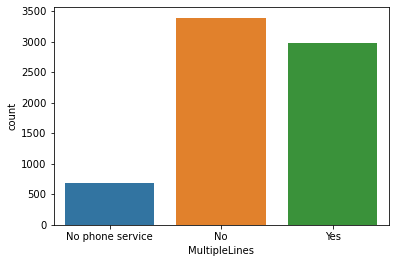

In [23]:
ax=sns.countplot('MultipleLines', data=df_cat)
print(df_cat['MultipleLines'].value_counts())

From above observation we can say that number of customer using No phone service is 682, No multipleLines are 3390 and having MultipleLines are 2971

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


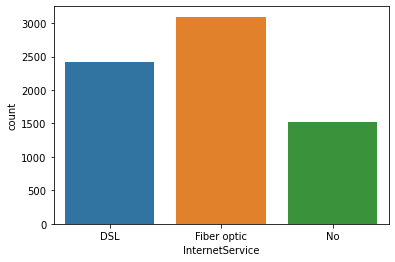

In [24]:
ax=sns.countplot('InternetService', data=df_cat)
print(df_cat['InternetService'].value_counts())

We can observe that customer not using internet services are 1526, using fiber obtic are 3096 and DSL are 2421

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


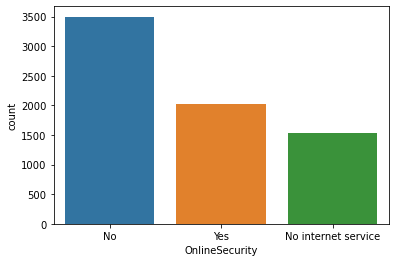

In [25]:
ax=sns.countplot('OnlineSecurity', data=df_cat)
print(df_cat['OnlineSecurity'].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


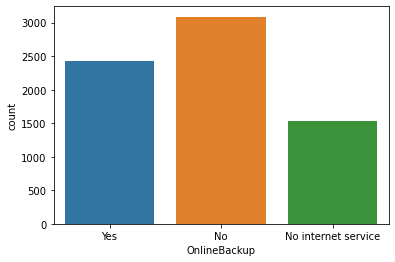

In [26]:
ax=sns.countplot( 'OnlineBackup', data=df_cat)
print(df_cat[ 'OnlineBackup'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


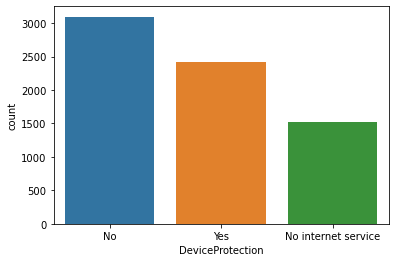

In [27]:
ax=sns.countplot('DeviceProtection', data=df_cat)
print(df_cat['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


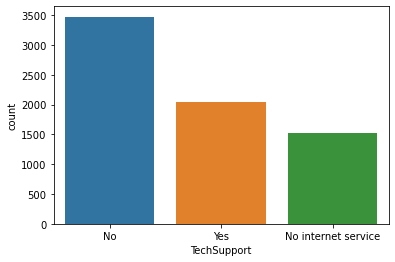

In [28]:
ax=sns.countplot('TechSupport', data=df_cat)
print(df_cat['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


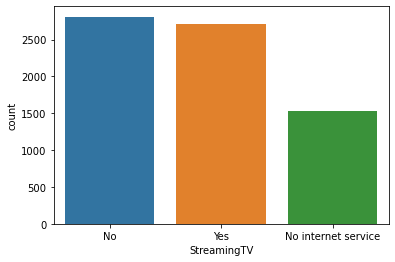

In [29]:
ax=sns.countplot('StreamingTV', data=df_cat)
print(df_cat['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


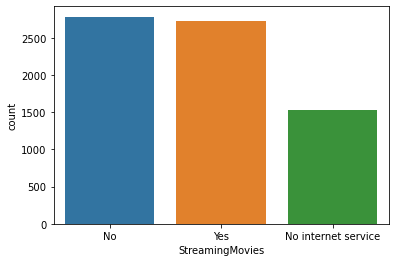

In [30]:
ax=sns.countplot('StreamingMovies', data=df_cat)
print(df_cat['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


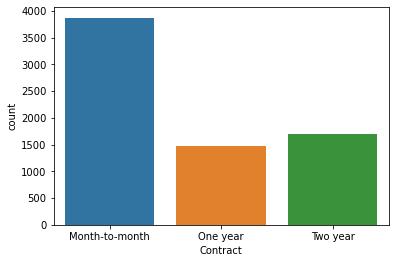

In [31]:
ax=sns.countplot('Contract', data=df_cat)
print(df_cat['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


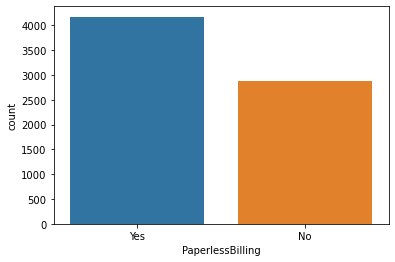

In [32]:
ax=sns.countplot( 'PaperlessBilling', data=df_cat)
print(df_cat[ 'PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


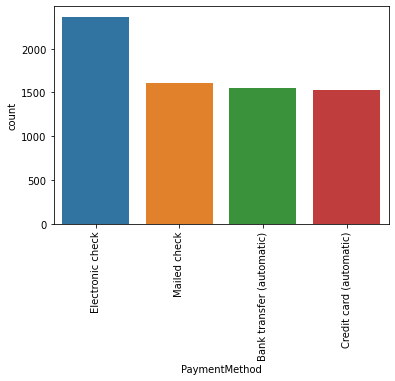

In [35]:
ax=sns.countplot('PaymentMethod',data=df_cat)
plt.xticks(rotation=90)
print(df_cat['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


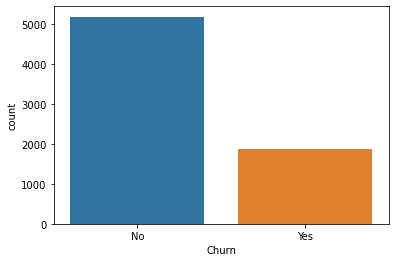

In [34]:
ax=sns.countplot('Churn', data=df_cat)
print(df_cat['Churn'].value_counts())

We can see that the churn value means customer who are switching are 1869, while not switching are 5174. We can observe that their is huge difference between the two classes, which simply means we have imbalance in our data

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


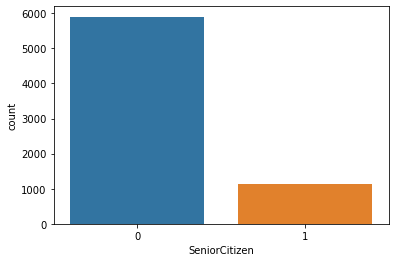

In [36]:
ax=sns.countplot('SeniorCitizen', data=df)
print(df['SeniorCitizen'].value_counts())

Here 1 indicate the senior citizen which is 1142 while 0 indicate customer who are not senior citizen.

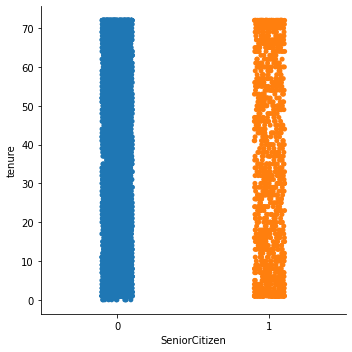

In [37]:
# Ordinal data
sns.catplot(x= 'SeniorCitizen', y='tenure', data=df)

We can see that there is very less diffrenece between senior citizen and non senior citizen tenure

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

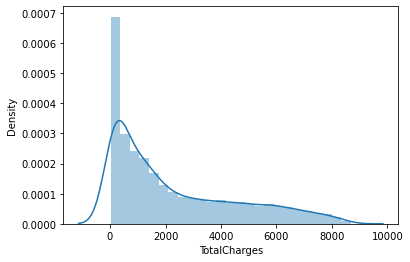

In [39]:
# Continuous data using distplot(TotalCharges, MonthlyCharges)

sns.distplot(df['TotalCharges'],kde=True)

We can Observe that the peak is around zero. and distribution goes to 10000

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

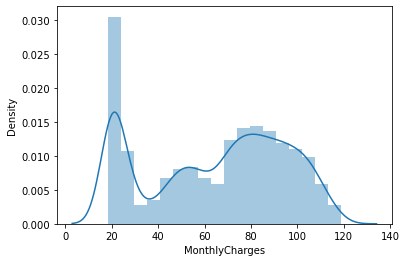

In [40]:
sns.distplot(df['MonthlyCharges'],kde=True)

We can observe that the data is distributed over the range of 0-140

In [41]:
# Statistical Description
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Since we have lots of Categorical Columns let's first encode them before moving ahead.




# Encoding

In [46]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=ord_enc.fit_transform(df[i].values.reshape(-1,1))
        

In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


In [48]:
df.dtypes

gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

We can observe that Encoding is done successfully. Now let's move ahead and check for correlation , before that let's draw pairplot

In [49]:
# Correlation of features and label
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


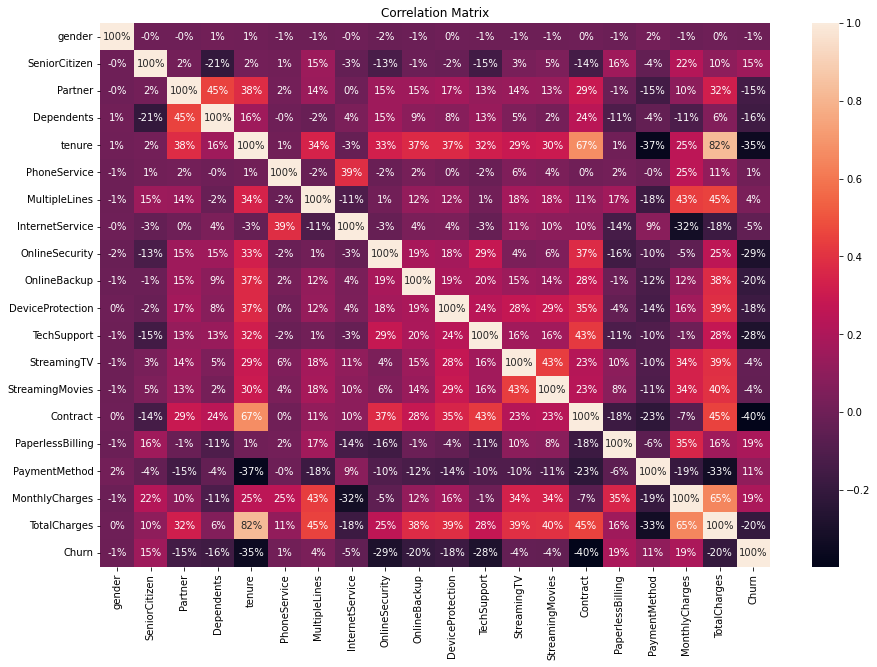

In [59]:
# let's visualize it using Heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.title("Correlation Matrix")
plt.show()

We can observe that churn is highly correlated to contract, also there is some correlation between tenure and TotalCharges. Let's do some more visualization to get a clear picture.

Also we can see that gender, PhoneService are very less correlated with Churn, just 1% 

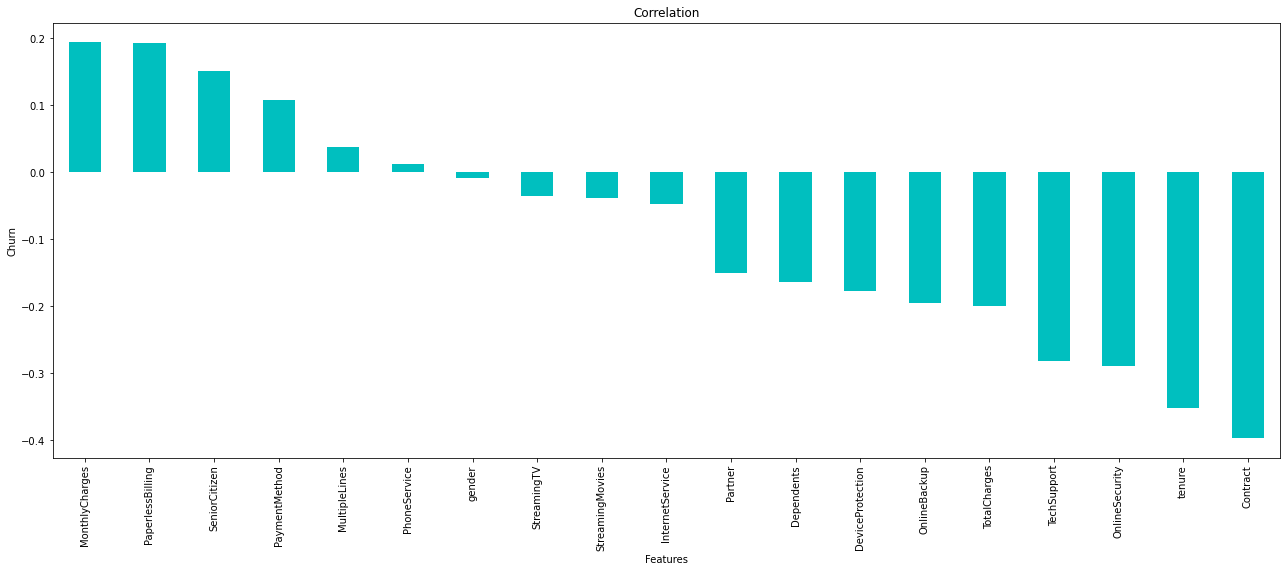

In [60]:
# correlation with target variable
plt.figure(figsize=(22,8))
df.corr()['Churn'].sort_values(ascending= False).drop(['Churn']).plot(kind= 'bar', color='c')
plt.xlabel("Features")
plt.ylabel("Churn")
plt.title("Correlation")
plt.show()

We can clearly observe that features are both positively and negatively related to Churn, where least correlated features are gender and PhoneService. Highly positively correlated is Monthly charges and Highly negatively correlated is Contract.

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

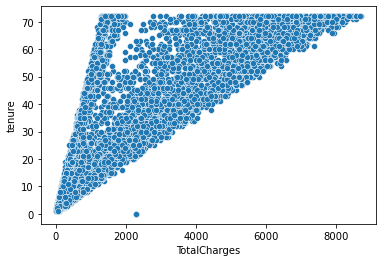

In [51]:
sns.scatterplot(x='TotalCharges',y='tenure', data=df)

We can observe that both of them are positively correlated, Let's drop Total Charges, as it is least correlated with Churn as compare to tenure

In [62]:
df.drop('TotalCharges', axis=1, inplace= True)

In [63]:
# Let's describe the dataset
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


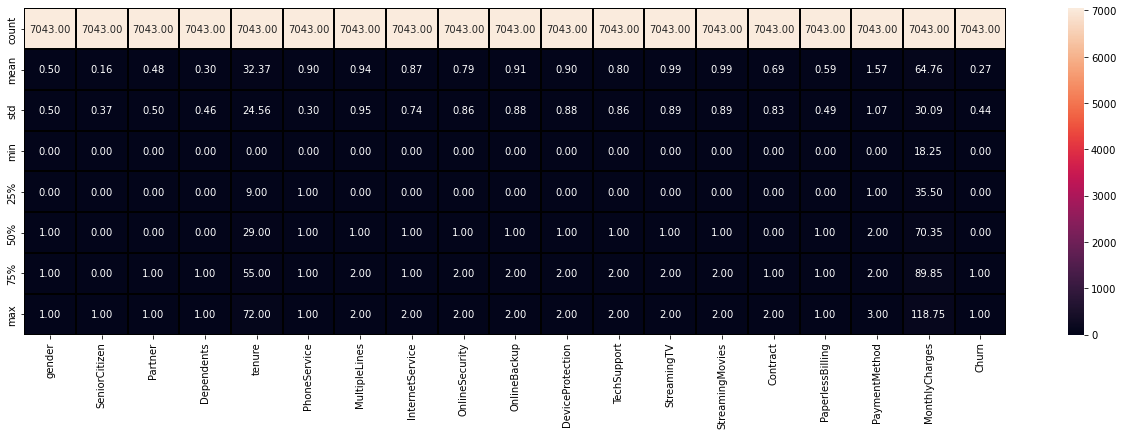

In [64]:
# let's visualize it using Heatmap.
plt.figure(figsize=(22,6))
sns.heatmap(df.describe(), annot= True,linewidths=0.1,linecolor='black', fmt='.2f')
plt.show()

So far data looks good, let's chcek for skewness and Outliers



# Skewness and Outlier Detection

In [65]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
Churn               1.063031
dtype: float64

We can observe skewness in SeniorCitizen, Dependents,PhoneService, TotalCharges and Churn if we considered threshold value for skewness be +/-0.5. However, Dependents,PhoneService are categorical column and Churn is our target variable, we cannot change them.

So we can remove skewness from SeniorCitizen and TotalCharges, we will use Power Transformer since SeniorCitizen has 0's. 

In [68]:
from sklearn.preprocessing import PowerTransformer
pwrTrans=PowerTransformer(method='yeo-johnson') 
feature=['SeniorCitizen']
df[feature]=pwrTrans.fit_transform(df[feature].values)


In [70]:

df.shape

(7043, 19)

The model treat it as categorical column since it has only two values. Let's Move ahead with outlier detection using boxplot.

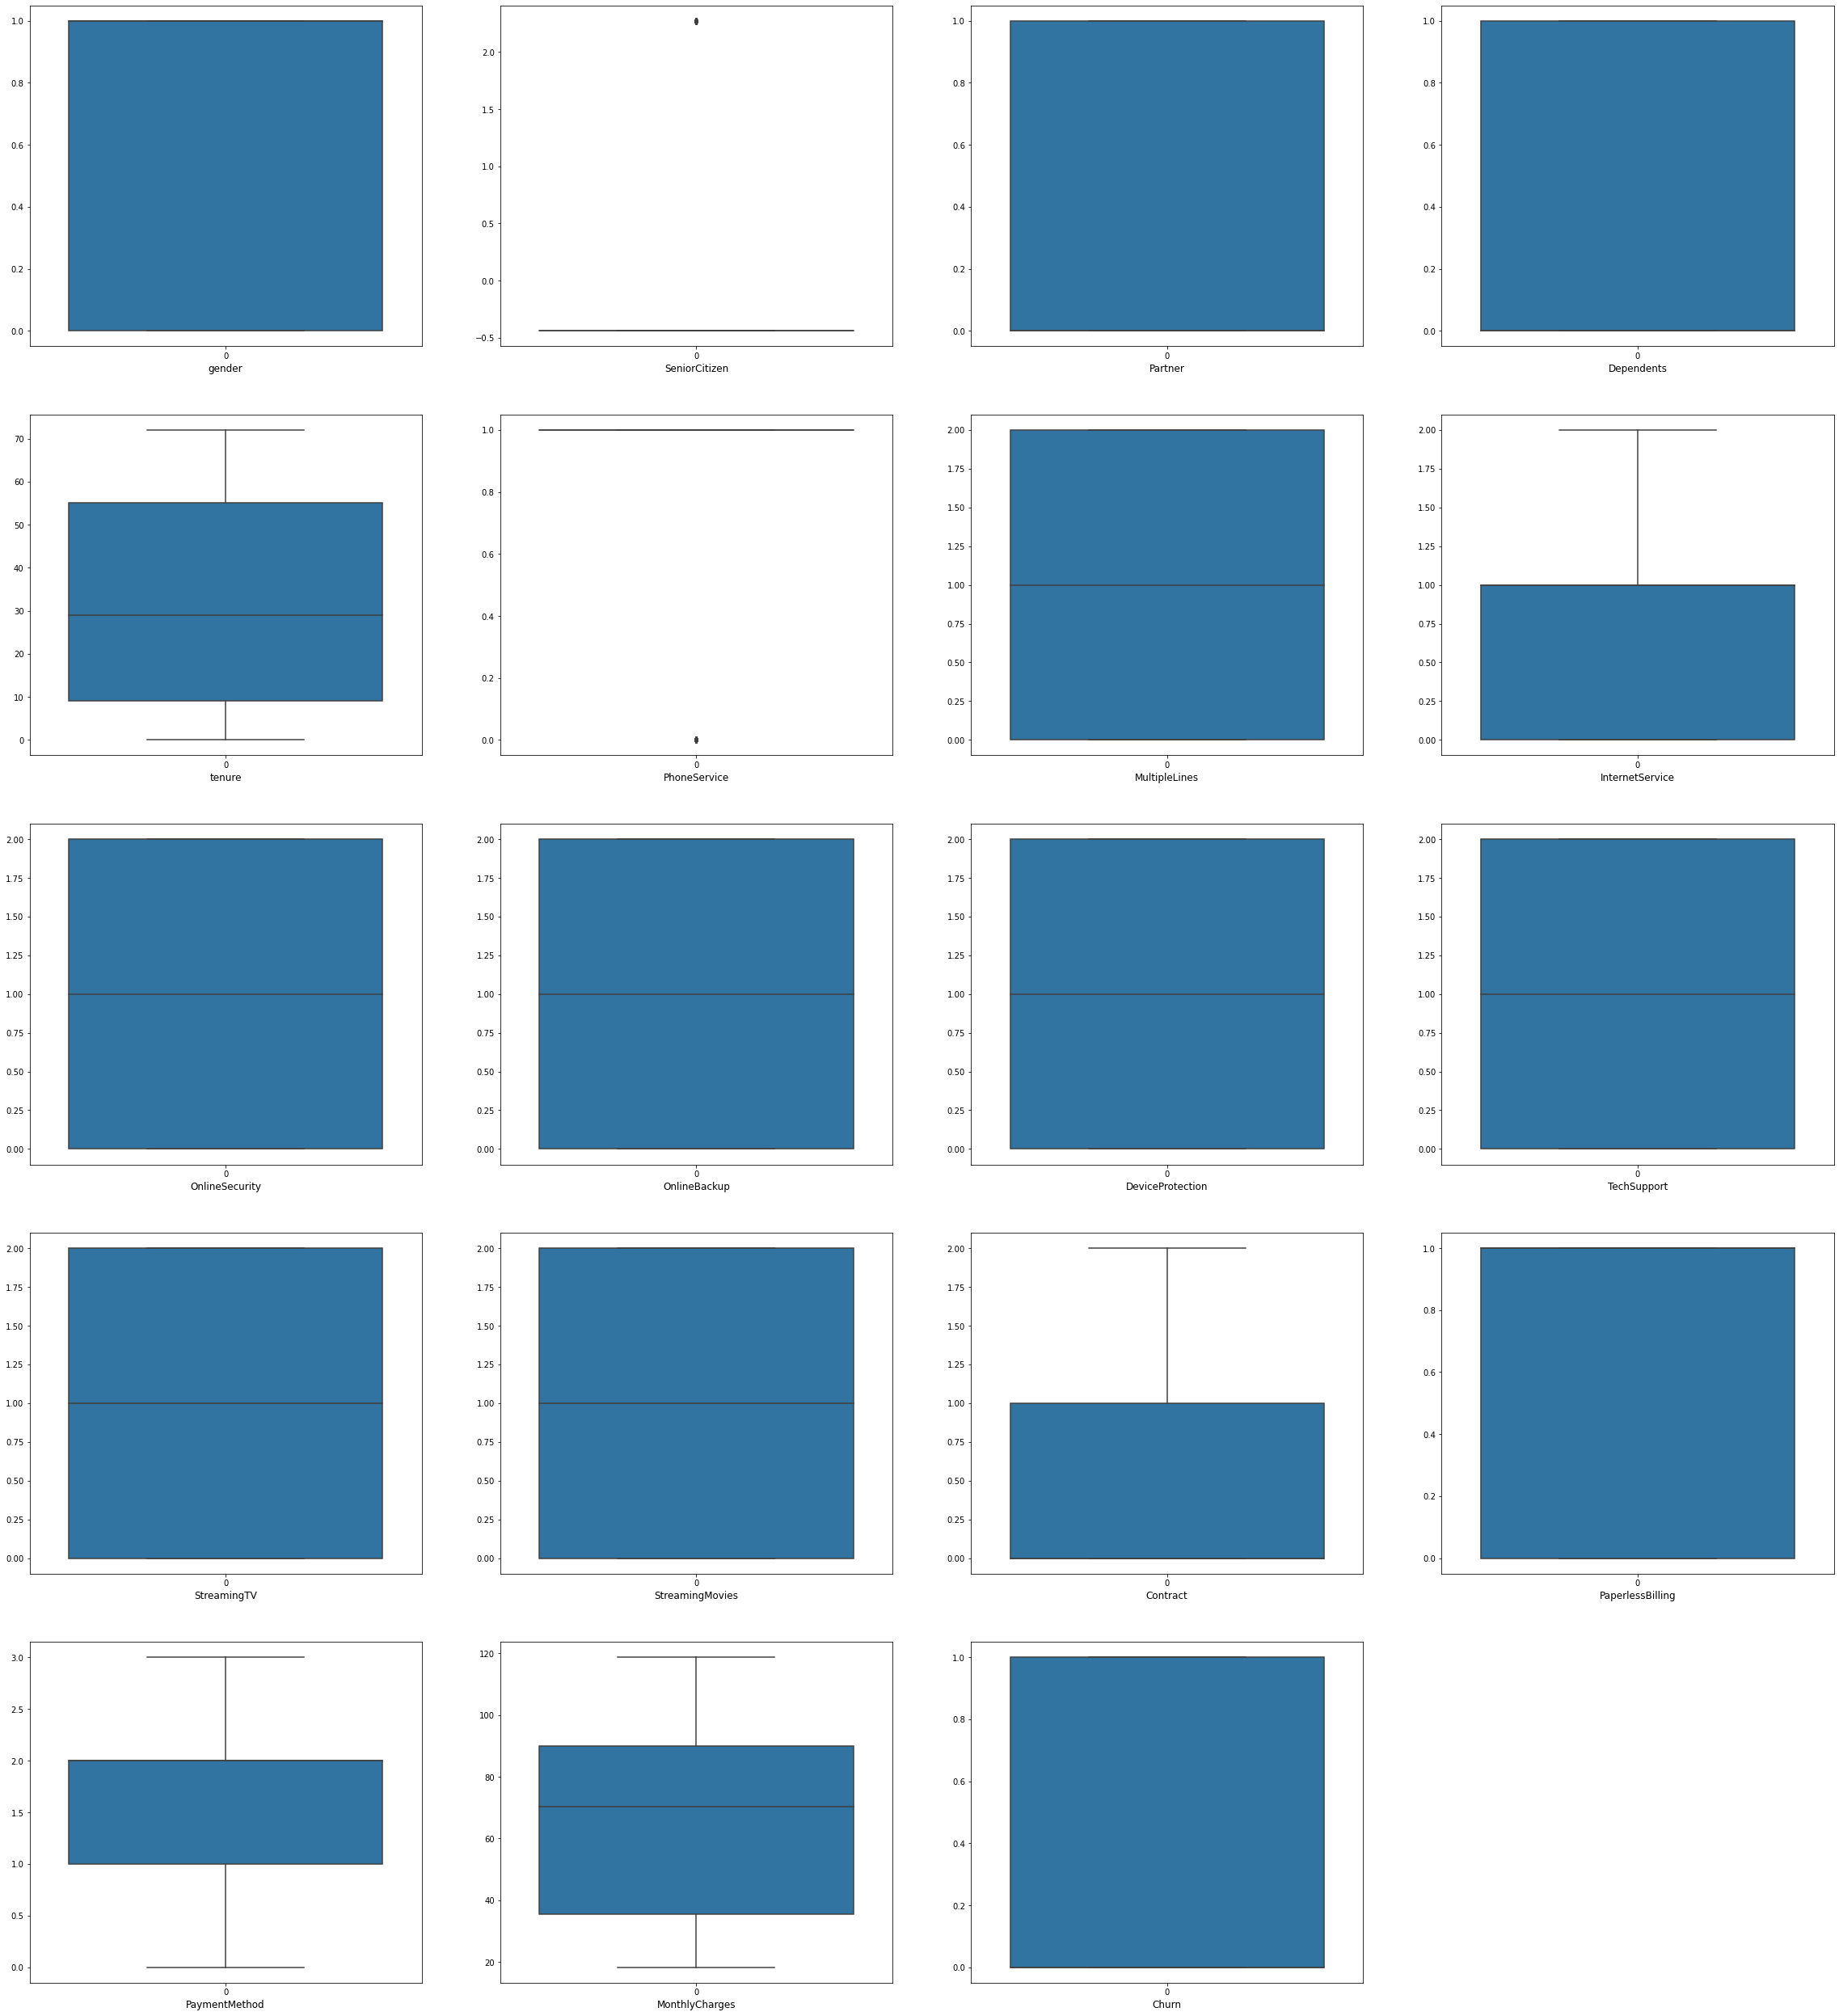

In [72]:
#Visualize the Outlier using BOXPLOT 

plt.figure(figsize=(40,45))
graph=1
for column in df:
    if graph<=19:      #25 denotes total number of columns
        plt.subplot(5,4,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=12)
    graph+=1
plt.show()

The Dataset looks good, No outliers are present, let's move ahead to start analysing our data and Build a Model. However, before that let's chcek for MultiColinearity and for that we need to scale our dataset. We will use Standard scaler.  

# Scaling and Checking for Multicolinearity using VIF

In [73]:
# Separating target from features

X=df.drop('Churn', axis=1)
y= df.Churn

In [74]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

# Scaling using Standard Scalar
X_Scaled=scalar.fit_transform(X)

In [75]:
#finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/1-R2): here R2=actual-predicted
#this method help us to identify multicollinearity.

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [77]:
vif=pd.DataFrame()
vif["vif"]= [variance_inflation_factor(X_Scaled,i) for i in range(X_Scaled.shape[1])]
vif["Features"]=X.columns

#let's check the values
vif

,vif,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


All the values are under 5 means , their is no multicolinearity in our dataset. 


Now everything looks good, let's move ahead with Model Building.

Here our label is Churn, with two classes, it will be a binary classification Model. We can start with Logistic Regression.

# Model Building

In [78]:
# importing libraries
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

# Model 
from sklearn.linear_model import LogisticRegression

In [86]:
# splitting dataset into test and train data, we are considering the test data to be 20%
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.25)

# LogisticRegression

In [87]:
LR=LogisticRegression()
maxAccu=0   # maximum accuracy
maxRS=0    #best random state value for which max accuracy is achieved

for i in range(1,200):
    X_train_ns,X_test,y_train_ns,y_test= train_test_split(X,y,test_size=0.20, random_state=i)
    LR.fit(X_train_ns,y_train_ns)   #fitting the data will train your model
    Y_pred=LR.predict(X_test)    # this is predicted target variable
    acc= accuracy_score(y_test,Y_pred)   # accuracy score
    print('Accuracy ', acc, 'Random state ', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Max accuracy ", maxAccu, " at random state ", i)
    
print("Best accuracy is ", maxAccu, "at random state ", maxRS)

Accuracy  0.8062455642299503 Random state  1
Max accuracy  0.8062455642299503  at random state  1
Accuracy  0.8048261178140526 Random state  2
Accuracy  0.8147622427253371 Random state  3
Max accuracy  0.8147622427253371  at random state  3
Accuracy  0.7814052519517388 Random state  4
Accuracy  0.7927608232789212 Random state  5
Accuracy  0.8041163946061036 Random state  6
Accuracy  0.8119233498935415 Random state  7
Accuracy  0.7764371894960965 Random state  8
Accuracy  0.7934705464868701 Random state  9
Accuracy  0.8026969481902059 Random state  10
Accuracy  0.8048261178140526 Random state  11
Accuracy  0.794889992902768 Random state  12
Accuracy  0.8055358410220014 Random state  13
Accuracy  0.8197303051809794 Random state  14
Max accuracy  0.8197303051809794  at random state  14
Accuracy  0.8005677785663591 Random state  15
Accuracy  0.8097941802696949 Random state  16
Accuracy  0.7991483321504613 Random state  17
Accuracy  0.8183108587650816 Random state  18
Accuracy  0.8026969481

Accuracy  0.8069552874378992 Random state  172
Accuracy  0.8055358410220014 Random state  173
Accuracy  0.8183108587650816 Random state  174
Accuracy  0.7955997161107168 Random state  175
Accuracy  0.794180269694819 Random state  176
Accuracy  0.8147622427253371 Random state  177
Accuracy  0.8140525195173882 Random state  178
Accuracy  0.8055358410220014 Random state  179
Accuracy  0.7984386089425124 Random state  180
Accuracy  0.815471965933286 Random state  181
Accuracy  0.8048261178140526 Random state  182
Accuracy  0.8076650106458482 Random state  183
Accuracy  0.8062455642299503 Random state  184
Accuracy  0.7785663591199432 Random state  185
Accuracy  0.8005677785663591 Random state  186
Accuracy  0.7970191625266146 Random state  187
Accuracy  0.7927608232789212 Random state  188
Accuracy  0.7863733144073811 Random state  189
Accuracy  0.8019872249822569 Random state  190
Accuracy  0.7977288857345636 Random state  191
Accuracy  0.8090844570617459 Random state  192
Accuracy  0.812

Best accuracy is  0.8317955997161107 at random state  139, so lets train our model with this random state.

In [89]:
# creating train test split for best random state
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20, random_state=139)

pred=LR.predict(X_train)
LR_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {LR_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=LR.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")


=====================Train Result========================
Accuracy Score : 79.82%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0.0          1.0  accuracy    macro avg  weighted avg
precision     0.840904     0.648843   0.79819     0.744873      0.789429
recall        0.893307     0.538411   0.79819     0.715859      0.798190
f1-score      0.866314     0.588491   0.79819     0.727402      0.791853
support    4124.000000  1510.000000   0.79819  5634.000000   5634.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[3684  440]
 [ 697  813]]

=====================Test Result========================
Accuracy Score : 82.54080908445705%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0.0         1.0  accuracy    macro avg  weighted avg
precision     0.861511    0.690236  0.825408     0.775873      0.817872
recall        0.912381 

In [90]:
# Cross Validation

from sklearn.model_selection import cross_val_score

# validating accuracy
scr= cross_val_score(LR, X, y, cv=10)
print("Cross Validation Score For Logistic Regression model : ", scr.mean())

Cross Validation Score For Logistic Regression model :  0.802783486460348


The model looks decent, let's go for few more model before deciding the final one.



# Ensemble Technique

In [93]:
from sklearn.ensemble import RandomForestClassifier

# Model
RF= RandomForestClassifier()

# Fit
RF.fit(X_train,y_train)

# Predict
pred=RF.predict(X_train)
RF_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {RF_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=RF.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
RF_acc=accuracy_score(y_test,y_pred)

=====================Train Result========================
Accuracy Score : 99.75%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0.0          1.0  accuracy    macro avg  weighted avg
precision     0.997579     0.997340  0.997515     0.997460      0.997515
recall        0.999030     0.993377  0.997515     0.996204      0.997515
f1-score      0.998304     0.995355  0.997515     0.996829      0.997514
support    4124.000000  1510.000000  0.997515  5634.000000   5634.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[4120    4]
 [  10 1500]]

=====================Test Result========================
Accuracy Score : 80.41163946061036%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0.0         1.0  accuracy    macro avg  weighted avg
precision     0.840070    0.653137  0.804116     0.746603      0.792441
recall        0.910476 

In [92]:
# Determining cross validation score.
scr= cross_val_score(RF,X,y,cv=10)
print("Cross validation Score of RandomForestClassifier model is : ", scr.mean())

Cross validation Score of RandomForestClassifier model is :  0.788582366215345


# KNN

In [94]:
#import library
from sklearn.neighbors import KNeighborsClassifier

#model
KNN= KNeighborsClassifier()

#fit
KNN.fit(X_train,y_train)

#predict
pred=KNN.predict(X_train)
KNN_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {KNN_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=KNN.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
KNN_acc= accuracy_score(y_test,y_pred)


=====================Train Result========================
Accuracy Score : 83.88%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0.0          1.0  accuracy    macro avg  weighted avg
precision     0.872913     0.727685  0.838836     0.800299      0.833990
recall        0.912706     0.637086  0.838836     0.774896      0.838836
f1-score      0.892366     0.679379  0.838836     0.785872      0.835282
support    4124.000000  1510.000000  0.838836  5634.000000   5634.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[3764  360]
 [ 548  962]]

=====================Test Result========================
Accuracy Score : 77.85663591199432%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0.0         1.0  accuracy    macro avg  weighted avg
precision     0.835455    0.576052  0.778566     0.705753      0.769361
recall        0.875238 

In [97]:
# Cross validation
scr= cross_val_score(KNN, X, y, cv=10)
KNN_scr=scr.mean()
print("Cross Validation Score For KNeighborsClassifier model : ", KNN_scr)

Cross Validation Score For KNeighborsClassifier model :  0.7712602756286266


# Boosting

In [98]:
# Model
from sklearn.ensemble import GradientBoostingClassifier

GBC= GradientBoostingClassifier()

#fit
GBC.fit(X_train, y_train)

pred=GBC.predict(X_train)
GBC_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {GBC_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=GBC.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
GBC_acc=accuracy_score(y_test,y_pred)


=====================Train Result========================
Accuracy Score : 82.32%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0.0          1.0  accuracy    macro avg  weighted avg
precision     0.853686     0.712046  0.823216     0.782866      0.815724
recall        0.915373     0.571523  0.823216     0.743448      0.823216
f1-score      0.883454     0.634093  0.823216     0.758773      0.816621
support    4124.000000  1510.000000  0.823216  5634.000000   5634.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[3775  349]
 [ 647  863]]

=====================Test Result========================
Accuracy Score : 81.97303051809794%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0.0         1.0  accuracy    macro avg  weighted avg
precision     0.854093    0.684211   0.81973     0.769152      0.810808
recall        0.914286 

In [100]:
# Cross validation
scr= cross_val_score(GBC,X,y, cv=10)
GBC_scr=scr.mean()
print("Cross validation Score of GradientBoosting Classifier model is : ", GBC_scr)

Cross validation Score of GradientBoosting Classifier model is :  0.8049121534493875


# SVC

In [101]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_train)
svc_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {svc_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=svc.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
svc_acc=accuracy_score(y_test,y_pred)


=====================Train Result========================
Accuracy Score : 78.67%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0.0          1.0  accuracy    macro avg  weighted avg
precision     0.808619     0.671111  0.786652     0.739865      0.771764
recall        0.928225     0.400000  0.786652     0.664113      0.786652
f1-score      0.864303     0.501245  0.786652     0.682774      0.766998
support    4124.000000  1510.000000  0.786652  5634.000000   5634.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[3828  296]
 [ 906  604]]

=====================Test Result========================
Accuracy Score : 80.90844570617459%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0.0         1.0  accuracy    macro avg  weighted avg
precision     0.825146    0.716346  0.809084     0.770746      0.797425
recall        0.943810 

In [103]:
# Cross validation

scr= cross_val_score(svc,X,y, cv=10)
svc_scr=scr.mean()
print("Cross validation Score of SVC model is : ", scr.mean())

Cross validation Score of SVC model is :  0.7905701966473244


# Decision Tree 

In [104]:
from sklearn.tree import DecisionTreeClassifier

# Model
DTC= DecisionTreeClassifier()

# Fit
DTC.fit(X_train,y_train)

#Predict
pred=DTC.predict(X_train)
DTC_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {DTC_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=DTC.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
DTC_acc=accuracy_score(y_test,y_pred)

=====================Train Result========================
Accuracy Score : 99.75%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0.0          1.0  accuracy    macro avg  weighted avg
precision     0.996617     1.000000  0.997515     0.998308      0.997523
recall        1.000000     0.990728  0.997515     0.995364      0.997515
f1-score      0.998305     0.995343  0.997515     0.996824      0.997511
support    4124.000000  1510.000000  0.997515  5634.000000   5634.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[4124    0]
 [  14 1496]]

=====================Test Result========================
Accuracy Score : 73.10149041873669%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0.0         1.0  accuracy    macro avg  weighted avg
precision     0.827317    0.473958  0.731015     0.650638      0.737285
recall        0.807619 

In [105]:
# Cross validation

scr= cross_val_score(svc,X,y, cv=10)
DTC_scr=scr.mean()
print("Cross validation Score of DecisionTreeClassifier model is : ", scr.mean())

Cross validation Score of DecisionTreeClassifier model is :  0.7905701966473244


# Let's Plot Roc Auc curve to choose the best model

In [106]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve

In [107]:
LR= LogisticRegression()
RF = RandomForestClassifier()
KNN= KNeighborsClassifier()
GBC= GradientBoostingClassifier()
svc= SVC()
DTC = DecisionTreeClassifier()



In [108]:
# Train test split

x= X
y=df['Churn']
x_train,x_test,Y_train,Y_test=train_test_split(x,y, test_size=0.20, random_state=139)

# Training with all classifier
LR.fit(x_train,Y_train)
KNN.fit(x_train,Y_train)
DTC.fit(x_train,Y_train)
RF.fit(x_train, Y_train)
GBC.fit(x_train,Y_train)
svc.fit(x_train,Y_train)

print("All models are trained")

All models are trained


In [109]:
# All models score captured
LR.score(x_test,Y_test)
KNN.score(x_test,Y_test)
DTC.score(x_test,Y_test)
RF.score(x_test,Y_test)
GBC.score(x_test,Y_test)
svc.score(x_test,Y_test)

print("All models test score captured")

All models test score captured


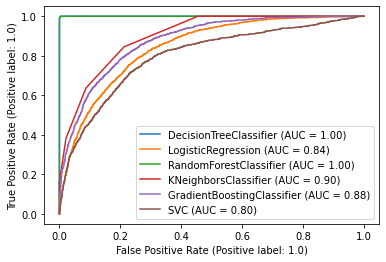

In [110]:
# Let's check ROC AUC for fitted model

# how well our model perform on training data

disp= plot_roc_curve(DTC, x_train, Y_train)

plot_roc_curve(LR, x_train,Y_train, ax=disp.ax_)   #ax_ means axes with confusion matrix

plot_roc_curve(RF, x_train,Y_train, ax=disp.ax_)

plot_roc_curve(KNN,x_train, Y_train, ax=disp.ax_)

plot_roc_curve(GBC, x_train,Y_train, ax=disp.ax_) 

plot_roc_curve(svc, x_train,Y_train, ax=disp.ax_) 

plt.legend(prop={'size' : 10}, loc= 'lower right')

plt.show()



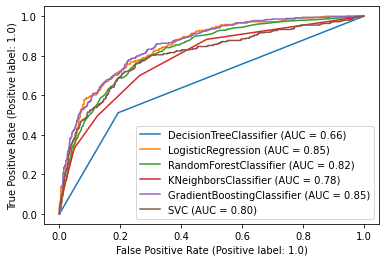

In [111]:
# How well our model works with test data

disp= plot_roc_curve(DTC, x_test, Y_test)

plot_roc_curve(LR, x_test,Y_test, ax=disp.ax_)   #ax_ means axes with confusion matrix

plot_roc_curve(RF, x_test,Y_test, ax=disp.ax_) 

plot_roc_curve(KNN, x_test,Y_test, ax=disp.ax_)

plot_roc_curve(GBC, x_test,Y_test, ax=disp.ax_) 

plot_roc_curve(svc, x_test,Y_test, ax=disp.ax_) 

plt.legend(prop={'size' : 10}, loc= 'lower right')

plt.show()


We can observe that both Logistic Regression and SVC model shows similar train and test curve, As the scores for Logistic Regression is slightly better then SVC, we will choose LogisticRegression as our final model.


Now, let's save our final model.


# Saving Model

In [112]:
# Pickeling of file or serialization of a file.

import joblib
joblib.dump(LR, "Customer_Churn.pkl")

['Customer_Churn.pkl']